In [1]:
import numpy as np
from model import EspAlgorithm
from model import visualize_metric_per_epoch
import torch
import pandas as pd

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.data', header=None)
ESP = EspAlgorithm(50, 20,  b=5, x=dataset.iloc[:, :-1], y=dataset.iloc[:, -1])
history = ESP.run_alg(0.4)

50 12.345727086489617
50 11.38711639713413
50 11.09391915618071
50 10.956961082782925
50 10.956961082782925
50 10.956961082782925
50 10.956961082782925
50 10.956961082782925
50 10.956961082782925
50 1.389774728330747
50 1.389774728330747
50 1.381007054787582
50 1.2263527895101614
50 1.2263527895101614
50 1.2263527895101614
50 1.2263527895101614
50 1.2263527895101614
50 1.2263527895101614
50 1.2263527895101614
50 1.2263527895101614
49 1.1569644790982538
49 1.1569644790982538
49 1.1569644790982538
48 1.1048567605699533
48 1.1048567605699533
48 1.1048567605699533
47 1.0631189298450587
47 1.0631189298450587
47 1.0631189298450587
46 1.0604931377485423
46 1.0604931377485423
46 1.0604931377485423
45 1.0545280107549484
45 1.0545280107549484
45 1.0545280107549484
44 1.0540915324080913
44 1.0540915324080913
44 1.0540915324080913
43 1.0466962240555266
43 1.0466962240555266
43 1.0466962240555266
42 1.0456518368255168
42 1.0456518368255168
42 1.0456518368255168
41 1.0260683879752774
41 1.0260683879

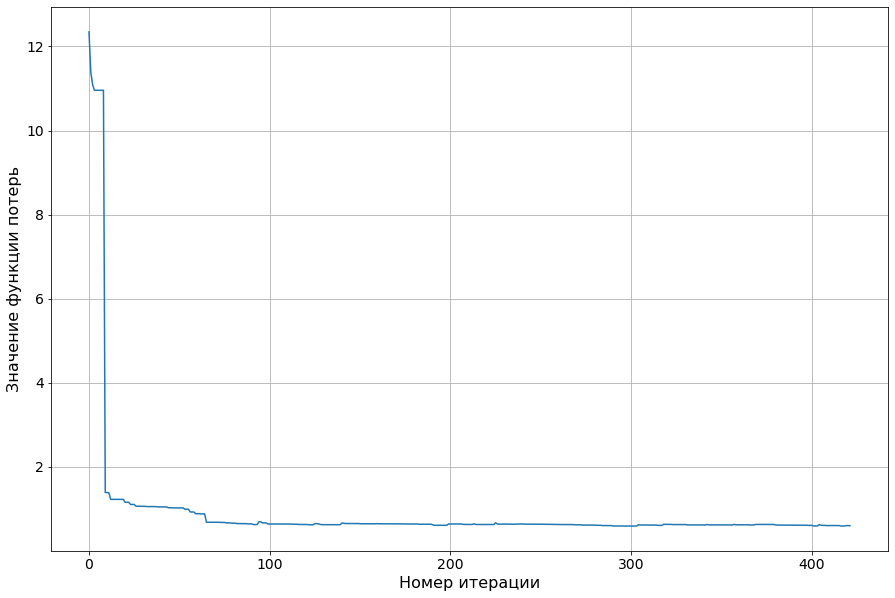

In [3]:
visualize_metric_per_epoch(history['loss'], 'loss')

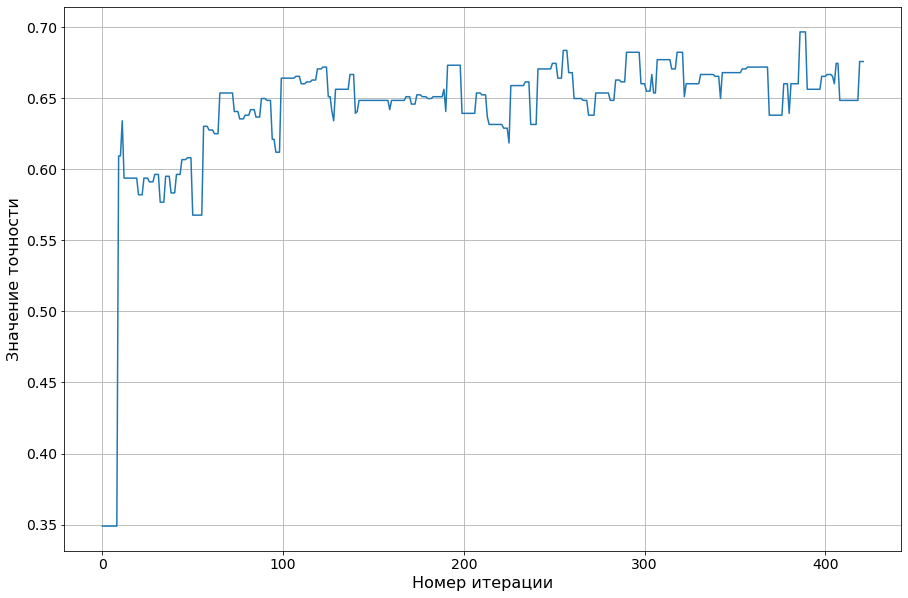

In [4]:
visualize_metric_per_epoch(history['accuracy'], 'accuracy')

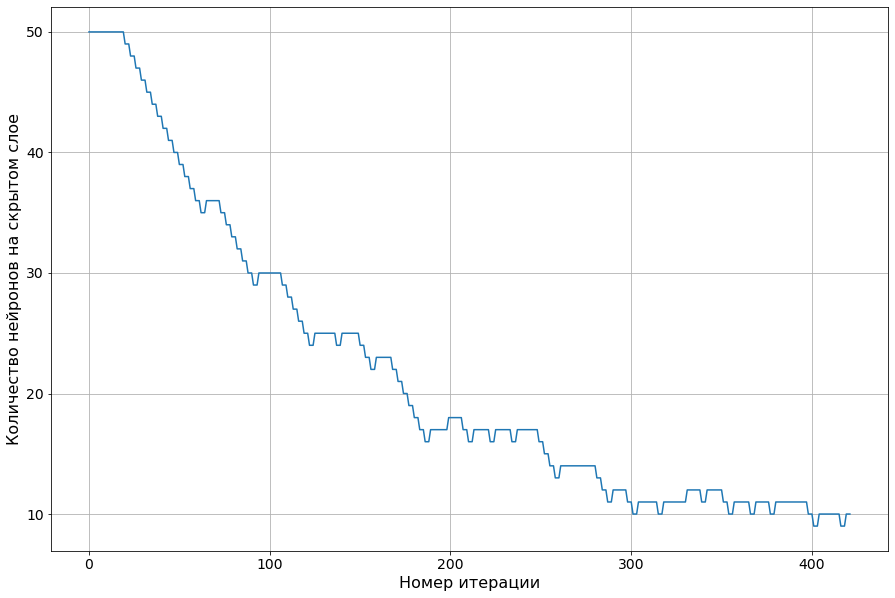

In [5]:
visualize_metric_per_epoch(history['models_hidden_size'], 'hidden')

In [20]:
max(history['accuracy'])

0.7317708333333334

In [21]:
history['loss'][np.argmax(history['accuracy'])]

0.5758798014525327

In [6]:
a[-0]

array([1.36346104, 1.49698506, 1.54484482])

In [3]:
dataset = pd.read_csv('pima-indians-diabetes.data', header=None)
dataset.columns = ['times_pregnant',
                   'Plasma glucose concentration',
                   'Diastolic blood pressure',
                   'Triceps skin fold thickness',
                   '2-Hour serum insulin',
                   'Body mass index',
                   'Diabetes pedigree function',
                   'Age',
                   'class']
dataset

,times_pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
max(history['accuracy']), history['loss'][np.argmax(history['accuracy'])], history['models_hidden_size'][np.argmax(history['accuracy'])]

(0.6966145833333334, 0.612959147001438, 11)

In [16]:
a = np.random.rand(5, 3, 7)

In [17]:
np.insert(a,
          [0],
          np.random.rand(5, 3, 1), axis=2)

array([[[0.07192574, 0.39277355, 0.1175834 , 0.43458723, 0.21965711,
         0.23112861, 0.42136571, 0.31835758],
        [0.71354351, 0.31455131, 0.66259431, 0.18794111, 0.43200576,
         0.67790744, 0.90054243, 0.16335454],
        [0.90753264, 0.72771978, 0.51177315, 0.57278979, 0.48902098,
         0.82042806, 0.21675794, 0.22727328]],

       [[0.28097901, 0.03719432, 0.74358858, 0.45093378, 0.33167041,
         0.34359993, 0.79705649, 0.22794418],
        [0.56082694, 0.13520024, 0.59660551, 0.83452909, 0.27633805,
         0.93393595, 0.81080542, 0.86340887],
        [0.03613218, 0.9841127 , 0.15196348, 0.26389615, 0.8875584 ,
         0.09946698, 0.7450534 , 0.2459065 ]],

       [[0.72976268, 0.03125389, 0.34424039, 0.17807504, 0.16447696,
         0.96025216, 0.33879237, 0.32160755],
        [0.26213369, 0.15618902, 0.88607715, 0.64718399, 0.92978157,
         0.07366119, 0.42594893, 0.96028192],
        [0.51384819, 0.99560099, 0.46643414, 0.85271249, 0.02939922,
       

In [20]:
a = np.random.rand(4, 7)
a

array([[0.09861708, 0.13775434, 0.06711929, 0.27684953, 0.28823971,
        0.4450208 , 0.14409314],
       [0.6002717 , 0.87382137, 0.21121148, 0.77242284, 0.49203532,
        0.20534136, 0.58158337],
       [0.38921581, 0.44738714, 0.60876634, 0.53290561, 0.29852344,
        0.74907278, 0.34799905],
       [0.46747209, 0.93423843, 0.48055231, 0.73823341, 0.13624324,
        0.48457059, 0.98653139]])

In [23]:
np.append(a, np.array([[1,2,3,4,5,6,7]]), axis=0)

array([[0.09861708, 0.13775434, 0.06711929, 0.27684953, 0.28823971,
        0.4450208 , 0.14409314],
       [0.6002717 , 0.87382137, 0.21121148, 0.77242284, 0.49203532,
        0.20534136, 0.58158337],
       [0.38921581, 0.44738714, 0.60876634, 0.53290561, 0.29852344,
        0.74907278, 0.34799905],
       [0.46747209, 0.93423843, 0.48055231, 0.73823341, 0.13624324,
        0.48457059, 0.98653139],
       [1.        , 2.        , 3.        , 4.        , 5.        ,
        6.        , 7.        ]])